<a href="https://colab.research.google.com/github/pankaj18/tensorflow_for_ml_and_dl/blob/master/mnist_fashion_using_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras 
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
mnist=keras.datasets.fashion_mnist

In [0]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

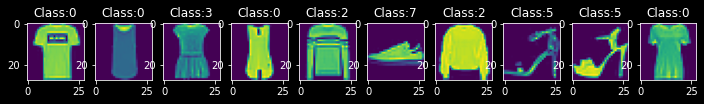

In [28]:
plt.style.use('dark_background')
plt.figure(figsize=(12,3))
for i in range(1,11):
  plt.subplot(1,10,i)
  plt.imshow(x_train[i])
  plt.title("Class:"+str(y_train[i]))

In [0]:
#Normalize data
x_train=x_train/255.0
x_test=x_test/255.0

In [30]:
x_train[0].shape

(28, 28)

# Neural Network Model for classification

In [31]:
model=keras.models.Sequential(
    [
     keras.layers.Flatten(input_shape=(28,28)),
     keras.layers.Dense(128,activation='relu'),
     keras.layers.Dense(10,activation='softmax')
    ]
)
print(model.summary())
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=5)
print()
model.evaluate(x_test,y_test)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4991 - accuracy: 0.8245
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3771 - accuracy: 0.8653
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3390 - accuracy: 0.8755
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - l

[0.3476627469062805, 0.8737999796867371]

# Improving Performance of Classifier with CNN

In [0]:
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

In [33]:
model=keras.models.Sequential(
    [
     keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
     keras.layers.MaxPooling2D(2,2),
     keras.layers.Conv2D(64,(3,3),activation='relu'),
     keras.layers.MaxPooling2D(2,2),
     keras.layers.Flatten(),
     keras.layers.Dense(128,activation='relu'),
     keras.layers.Dense(10,activation='softmax')
    ]
)
print(model.summary())
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=5)
print("%%%%%%%%%%%"+"\n"+"evaluation results")
model.evaluate(x_test,y_test)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_11 (Dense)             (None, 10)               

[0.2551865875720978, 0.9071000218391418]

# Visualizing Convolution and Pooling

In [34]:
print(y_test[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6
 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


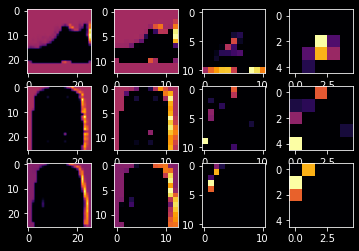

In [58]:

fig,ax=plt.subplots(3,4)
first_img=0
second_img=7
third_img=26
convolution_number=2
from tensorflow.keras import models
layer_outputs=[layer.output for layer in model.layers]
activation_model=tf.keras.models.Model(inputs=model.input,outputs=layer_outputs)
for x in range(0,4):
  f1=activation_model.predict(x_test[first_img].reshape(1,28,28,1))[x]
  ax[0,x].imshow(f1[0,:,:,convolution_number],cmap='inferno')
  ax[0,x].grid(False)
  f2=activation_model.predict(x_test[second_img].reshape(1,28,28,1))[x]
  ax[1,x].imshow(f2[0,:,:,convolution_number],cmap='inferno')
  ax[1,x].grid(False)
  f3=activation_model.predict(x_test[third_img].reshape(1,28,28,1))[x]
  ax[2,x].imshow(f3[0,:,:,convolution_number],cmap='inferno')
  ax[2,x].grid(False)
  


In [0]:
layer_outputs=[layer.output for layer in model.layers]

In [60]:
layer_outputs

[<tf.Tensor 'conv2d_6/Identity:0' shape=(None, 26, 26, 64) dtype=float32>,
 <tf.Tensor 'max_pooling2d_6/Identity:0' shape=(None, 13, 13, 64) dtype=float32>,
 <tf.Tensor 'conv2d_7/Identity:0' shape=(None, 11, 11, 64) dtype=float32>,
 <tf.Tensor 'max_pooling2d_7/Identity:0' shape=(None, 5, 5, 64) dtype=float32>,
 <tf.Tensor 'flatten_5/Identity:0' shape=(None, 1600) dtype=float32>,
 <tf.Tensor 'dense_10/Identity:0' shape=(None, 128) dtype=float32>,
 <tf.Tensor 'dense_11/Identity:0' shape=(None, 10) dtype=float32>]

In [61]:
activation_model=tf.keras.Model(inputs=model.input,outputs=layer_outputs)
activation_model

In [0]:
f1=activation_model.predict(x_test[first_img].reshape(1,28,28,1))

In [64]:
len(f1)

7

In [65]:
f1[1].shape

(1, 13, 13, 64)

# Classifier Model Using 16 CNN filters  

In [66]:
model=keras.models.Sequential(
    [
     keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(28,28,1)),
     keras.layers.MaxPooling2D(2,2),
     keras.layers.Conv2D(16,(3,3),activation='relu'),
     keras.layers.MaxPooling2D(2,2),
     keras.layers.Flatten(),
     keras.layers.Dense(128,activation='relu'),
     keras.layers.Dense(10,activation='softmax')
    ]
)
print(model.summary())
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10)
print("%%%%%%%%%%%"+"\n"+"evaluation results")
model.evaluate(x_test,y_test)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 16)        2320      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               51328     
_________________________________________________________________
dense_13 (Dense)             (None, 10)               

[0.2683974802494049, 0.9043999910354614]

# Classifier Model Using 32 CNN filters  

In [68]:
model=keras.models.Sequential(
    [
     keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
     keras.layers.MaxPooling2D(2,2),
     keras.layers.Conv2D(32,(3,3),activation='relu'),
     keras.layers.MaxPooling2D(2,2),
     keras.layers.Flatten(),
     keras.layers.Dense(128,activation='relu'),
     keras.layers.Dense(10,activation='softmax')
    ]
)
print(model.summary())
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10)
print("%%%%%%%%%%%"+"\n"+"evaluation results")
model.evaluate(x_test,y_test)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               102528    
_________________________________________________________________
dense_17 (Dense)             (None, 10)               

[0.2825380861759186, 0.909500002861023]

# Classifier Model using 64 CNN filters

In [69]:
model=keras.models.Sequential(
    [
     keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)),
     keras.layers.MaxPooling2D(2,2),
     keras.layers.Conv2D(64,(3,3),activation='relu'),
     keras.layers.MaxPooling2D(2,2),
     keras.layers.Flatten(),
     keras.layers.Dense(128,activation='relu'),
     keras.layers.Dense(10,activation='softmax')
    ]
)
print(model.summary())
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10)
print("%%%%%%%%%%%"+"\n"+"evaluation results")
model.evaluate(x_test,y_test)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               204928    
_________________________________________________________________
dense_19 (Dense)             (None, 10)               

[0.3231028914451599, 0.9038000106811523]

# Classifier Model using only one cnvolution layer

In [71]:
model=keras.models.Sequential(
    [
     keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
     keras.layers.MaxPooling2D(2,2),
     #keras.layers.Conv2D(64,(3,3),activation='relu'),
     #keras.layers.MaxPooling2D(2,2),
     keras.layers.Flatten(),
     keras.layers.Dense(128,activation='relu'),
     keras.layers.Dense(10,activation='softmax')
    ]
)
print(model.summary())
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10)
print("%%%%%%%%%%%"+"\n"+"evaluation results")
model.evaluate(x_test,y_test)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 5408)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 128)               692352    
_________________________________________________________________
dense_23 (Dense)             (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3846 - accuracy: 0.8624
Epoch 

[0.3195008933544159, 0.9110000133514404]